## Importing Datasets

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv(r'C:\Users\Kanishk\Downloads\IE Courses\Data Science\Udemy-Machine Learning\bitcoin-price-prediction\bitcoin_price_Training - Training.csv')
df.head()


,Date,Open,High,Low,Close,Volume,Market Cap
0,"Jul 31, 2017",2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,"Jul 30, 2017",2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,"Jul 29, 2017",2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
3,"Jul 28, 2017",2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
4,"Jul 27, 2017",2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"


## Data Cleaning

In [2]:
df=df.fillna(df.mean())
df.iloc[:,1:7] = df.iloc[:,1:7].replace({'\-': '', ',': ''}, regex=True)
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Jul 31, 2017",2763.24,2889.62,2720.61,2875.34,860575000,45535800000
1,"Jul 30, 2017",2724.39,2758.53,2644.85,2757.18,705943000,44890700000
2,"Jul 29, 2017",2807.02,2808.76,2692.80,2726.45,803746000,46246700000
3,"Jul 28, 2017",2679.73,2897.45,2679.73,2809.01,1380100000,44144400000
4,"Jul 27, 2017",2538.71,2693.32,2529.34,2671.78,789104000,41816500000


In [3]:
df.info()
df.head()
df['Volume']=pd.to_numeric(df['Volume'])
df['Market Cap']=pd.to_numeric(df['Market Cap'])
df[['Volume','Market Cap']]=df[['Volume','Market Cap']].astype('float64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 7 columns):
Date          1556 non-null object
Open          1556 non-null float64
High          1556 non-null float64
Low           1556 non-null float64
Close         1556 non-null float64
Volume        1556 non-null object
Market Cap    1556 non-null object
dtypes: float64(4), object(3)
memory usage: 85.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 7 columns):
Date          1556 non-null object
Open          1556 non-null float64
High          1556 non-null float64
Low           1556 non-null float64
Close         1556 non-null float64
Volume        1313 non-null float64
Market Cap    1556 non-null float64
dtypes: float64(6), object(1)
memory usage: 85.2+ KB


## Checking for null values

In [4]:
df.isna().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume        243
Market Cap      0
dtype: int64

## Imputation of Missing Values

In [5]:
import numpy as np
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='median')
imp.fit(df['Volume'].values.reshape(-1,1))
SimpleImputer()
df['Volume']=imp.transform(df['Volume'].values.reshape(-1,1))

## Data Preparation 

In [6]:
X=df.iloc[:,1:6]
y=df.iloc[:,6].values

## Data Standardization using StandardScaler function

In [7]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X= sc.fit_transform(X)
y= y.reshape(-1,1)
y=sc.fit_transform(y)



## Descriptive Statistics

In [9]:
df.describe()

,Open,High,Low,Close,Volume,Market Cap
count,1556.000000,1556.000000,1556.000000,1556.000000,1.556000e+03,1.556000e+03
mean,582.625328,597.992847,567.851446,584.239396,1.321002e+08,8.694353e+09
std,523.137312,542.992855,505.877401,525.904442,3.002166e+08,8.707288e+09
min,68.500000,74.560000,65.530000,68.430000,2.857830e+06,7.792550e+08
25%,254.287500,260.327500,248.835000,254.320000,2.322780e+07,3.598355e+09
50%,438.600000,447.560000,430.570000,438.855000,4.530140e+07,6.386210e+09
75%,662.437500,674.525000,646.735000,663.402500,7.767028e+07,9.898830e+09
max,2953.220000,2999.910000,2840.530000,2958.110000,2.569530e+09,4.839120e+10


In [10]:
df.corr()

,Open,High,Low,Close,Volume,Market Cap
Open,1.000000,0.998561,0.998157,0.997514,0.859385,0.995153
High,0.998561,1.000000,0.997320,0.998596,0.869534,0.993298
Low,0.998157,0.997320,1.000000,0.998755,0.852743,0.994575
Close,0.997514,0.998596,0.998755,1.000000,0.861193,0.993041
Volume,0.859385,0.869534,0.852743,0.861193,1.000000,0.876105
Market Cap,0.995153,0.993298,0.994575,0.993041,0.876105,1.000000


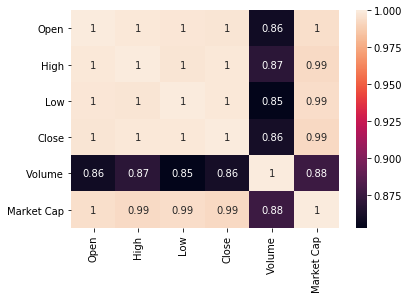

In [12]:
sns.heatmap(df.corr(),annot=True)

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Making Keras Model with 5 input layers, 5 hidden layers and 1 output layer

In [20]:
from keras import Sequential
from keras.layers import Dense
def build_regressor():
    regressor = Sequential()
    regressor.add(Dense(units=5, input_dim=5,kernel_initializer='normal',activation='relu'))
    regressor.add(Dense(units=1,kernel_initializer='normal'))
    regressor.compile(optimizer='adam', loss='mean_squared_error',  metrics=['mse','accuracy'])
    return regressor

In [21]:
from keras.wrappers.scikit_learn import KerasRegressor
regressor = KerasRegressor(build_fn=build_regressor, batch_size=20,epochs=500,verbose=0)

In [22]:
regressor.fit(X_train,y_train)

In [23]:
y_pred= regressor.predict(X_test)

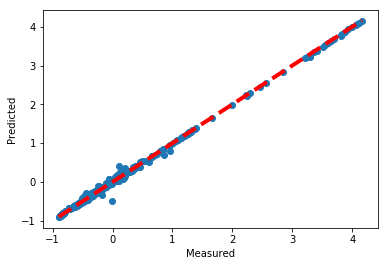

In [24]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

## Performance Metrics

In [25]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.02064113790251434
MSE: 0.0017943205935911774
RMSE: 0.04235942154457704


## Linear Regression Model

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
lm = LinearRegression()

In [28]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
print(lm.intercept_)

[-0.00027527]


In [30]:
predictions = lm.predict(X_test)

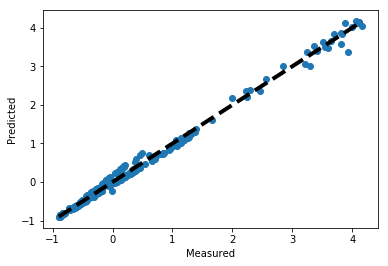

In [31]:
fig, ax = plt.subplots()
ax.scatter(y_test, predictions)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

## Performance Metrics

In [32]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.05481051124445244
MSE: 0.006159580939005525
RMSE: 0.07848299777025292
